# **1. Perkenalan Dataset**


**Pima Indian Diabetes Dataset**

Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang disertakan dalam kumpulan data. Beberapa batasan ditempatkan pada pemilihan contoh-contoh ini dari basis data yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan berusia minimal 21 tahun yang berasal dari suku Indian Pima. Kaggle.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
#Type your code here
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
df.duplicated().sum()

np.int64(0)

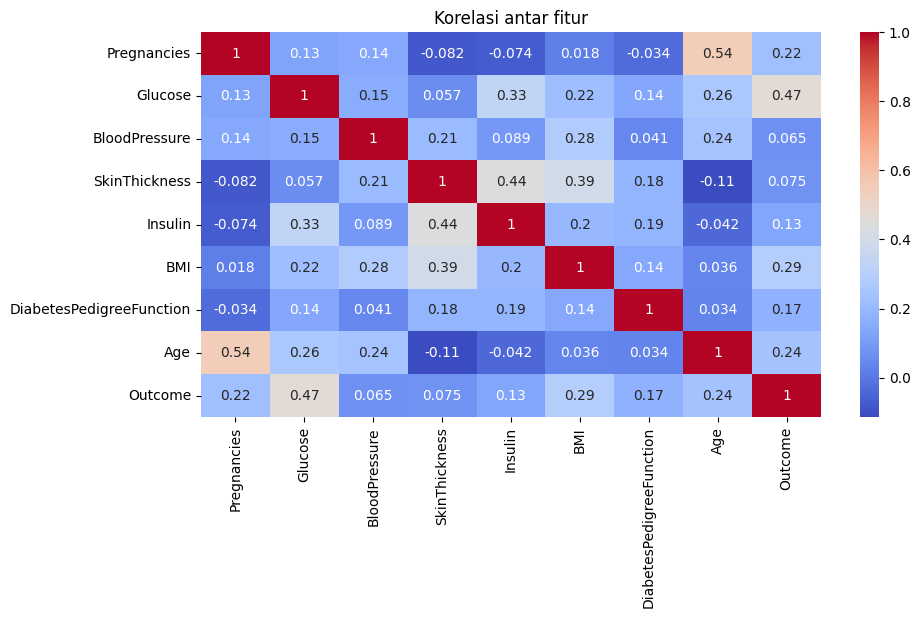

In [10]:
# Hitung Korelasi
correlation = df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()

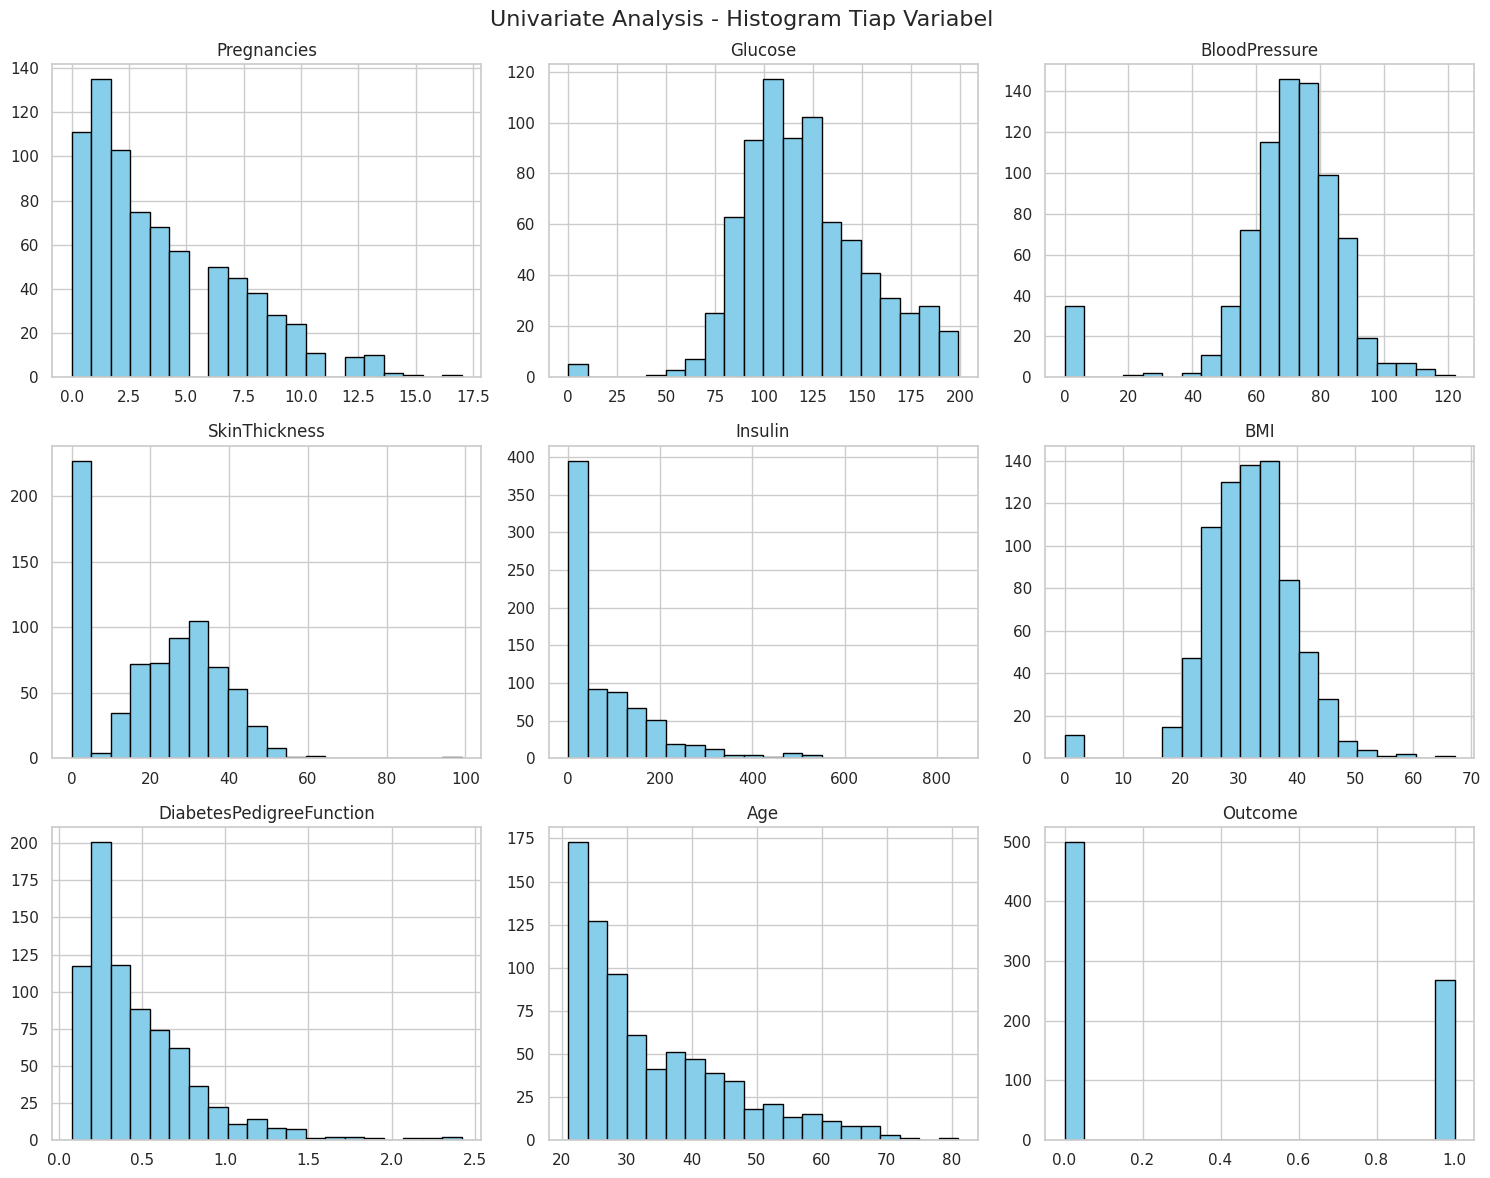

In [11]:
#Melihat histogram setiap fitur
# Set style
sns.set(style="whitegrid")

# Visualisasi histogram tiap fitur
df.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Univariate Analysis - Histogram Tiap Variabel', fontsize=16)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

pada tahap ini bertujuan untuk menyiapkan data sebelum proses modelling. Langkah yang dilakukan yaitu melihat apakah ada nilai 0 pada fitur yang tidak masuk akal ketika bernilai nol seperti 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'

In [12]:
# Daftar kolom yang tidak mungkin bernilai nol
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti nilai 0 dengan NaN
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Cek jumlah missing value
df[cols_with_zero_invalid].isnull().sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [13]:
# Imputasi nilai NaN dengan median
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].fillna(df[cols_with_zero_invalid].median())

In [14]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
